# Tools - Simple Manipulations

In [4]:
import os
from datetime import datetime

import pandas
import pandas_datareader as pdr
import pandas_datareader.data as web

In [6]:
os.environ["TIINGO_API_KEY"] = "3756e61ce80297e10be9fc3c12afb9dda7b7b885"
os.environ["ALPHAVANTAGE_API_KEY"] = "ME45Y2A6S4CWMI4O"
os.environ["QUANDL_API_KEY"] = "BCzkk3NDWt7H9yjzx-DY" 

In [7]:
df = web.DataReader('EURONEXT/ABN', 'quandl', '2019-01-01', '2020-01-05')

In [8]:
df.head()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2020-01-03,16.505,16.505,16.265,16.325,2460206.0,40238363.0
2020-01-02,16.350,16.640,16.320,16.555,2686481.0,44400594.0
2019-12-31,16.220,16.270,16.125,16.220,656754.0,10642726.0
2019-12-30,16.250,16.320,16.195,16.210,1292500.0,20997704.0
2019-12-27,16.300,16.390,16.205,16.250,1711092.0,27820623.0


In [9]:
df.tail()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2019-01-08,21.47,21.74,21.45,21.47,1510395.0,32578265.0
2019-01-07,21.45,21.66,21.39,21.50,1325103.0,28493542.0
2019-01-04,20.80,21.39,20.74,21.32,2028884.0,43003258.0
2019-01-03,20.38,20.86,20.38,20.70,1143706.0,23645775.0
2019-01-02,20.19,20.57,19.92,20.53,1297024.0,26367630.0


# Plotting your first chart

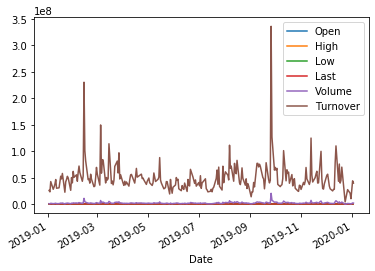

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot();

## Plotting a price and volume chart

In [11]:
prices = df['Last']
volumes = df['Volume']

In [12]:
prices.head()

Date
2020-01-03    16.325
2020-01-02    16.555
2019-12-31    16.220
2019-12-30    16.210
2019-12-27    16.250
Name: Last, dtype: float64

In [13]:
volumes.tail()

Date
2019-01-08    1510395.0
2019-01-07    1325103.0
2019-01-04    2028884.0
2019-01-03    1143706.0
2019-01-02    1297024.0
Name: Volume, dtype: float64

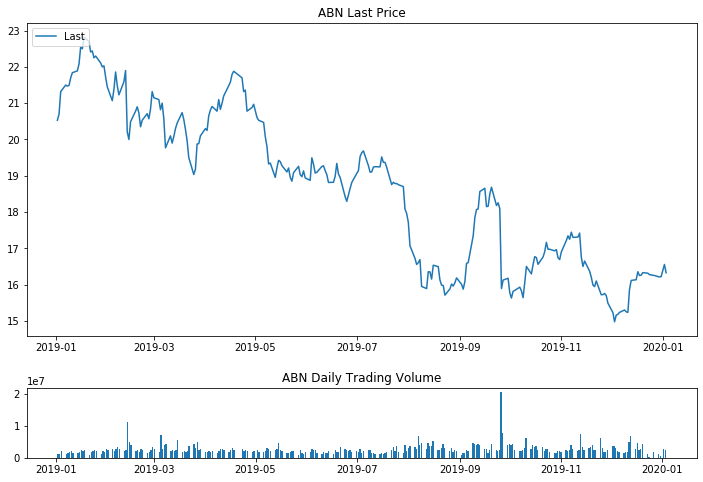

In [15]:
# The top plot consisting of dailing closing prices
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(prices.index, prices, label='Last')
plt.title('ABN Last Price')
plt.legend(loc=2)

# The bottom plot consisting of daily trading volume
bottom = plt.subplot2grid((4, 4), (3,0), rowspan=1, colspan=4)
bottom.bar(volumes.index, volumes)
plt.title('ABN Daily Trading Volume')

plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75)

## Plotting a candlestick chart

In [18]:
# !pip install mplfinance

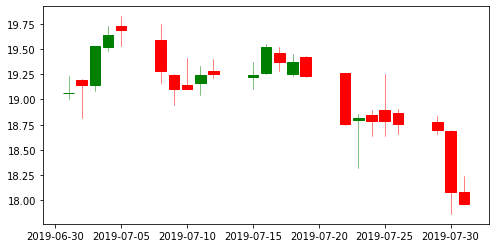

In [20]:
%matplotlib inline

from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

start_date='2019-07-01'
end_date='2019-07-31'

df_subset = web.DataReader('EURONEXT/ABN', 'quandl', start_date, end_date)

df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date','Open', 'High', 'Low', 'Last']]

figure, ax = plt.subplots(figsize = (8,4))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax, 
                 df_ohlc.values, 
                 width=0.8, 
                 colorup='green', 
                 colordown='red')
plt.show()

# Performing Financial Analytics

## Plotting returns

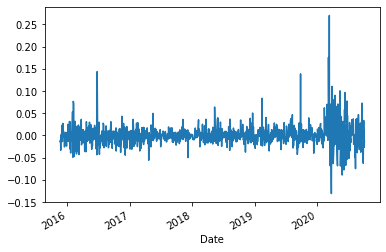

In [25]:
df = web.DataReader('EURONEXT/ABN', 'quandl')['Last']
daily_changes = df.pct_change(periods=1)
daily_changes.plot();

## Plotting cummulative returns

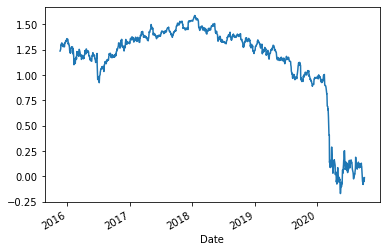

In [26]:
df_cumsum = daily_changes.cumsum()
df_cumsum.plot();

## Plotting Histograms

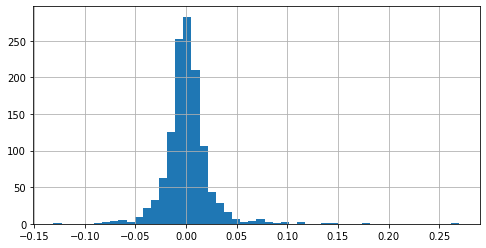

In [27]:
daily_changes.hist(bins=50, figsize=(8, 4));

In [28]:
daily_changes.describe()

count    1241.000000
mean        0.000997
std         0.023060
min        -0.130852
25%        -0.009239
50%        -0.000210
75%         0.009452
max         0.269765
Name: Last, dtype: float64

## Plotting volatility

In [32]:
df.asfreq('D', method='ffill')

Series([], Freq: D, Name: Last, dtype: float64)

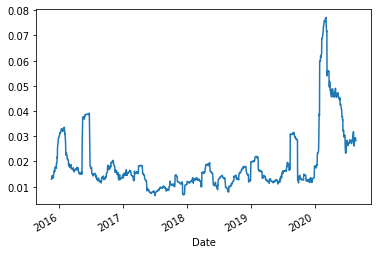

In [33]:
df_returns = df.pct_change()
df_std = df_returns.rolling(window=30, min_periods=30).std()
df_std.plot();

## Quantile-Quantile Plot

C:\Users\scott\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\scott\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\scott\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


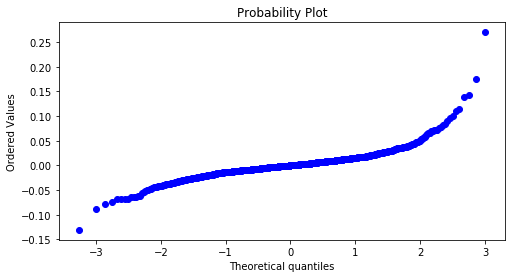

In [36]:
from scipy import stats
from scipy.stats import probplot

daily_changes = df_returns

figure = plt.figure(figsize=(8,4))
ax = figure.add_subplot(111)

stats.probplot(daily_changes, dist='norm', plot=ax)
plt.show();

## Downloading multiple time series data

In [58]:
import pandas as pd

df_dict = {}

for symbol in ['GOOG', 'IBM', 'F']:

    df_dict[symbol] = web.DataReader('WIKI/' + symbol, 'quandl')['Close']
    print(len(df))
    
my_df = pd.DataFrame(df_dict)

620
620
620


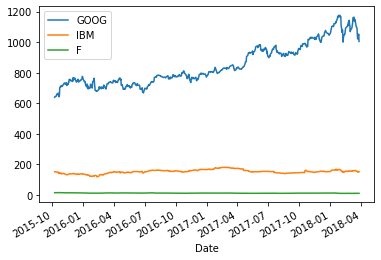

In [61]:
my_df.plot();

## Displaying the Correlation Matrix


In [63]:
my_df.pct_change().corr()

,GOOG,IBM,F
GOOG,1.000000,0.362471,0.287083
IBM,0.362471,1.000000,0.387285
F,0.287083,0.387285,1.000000


## Plotting Correlations

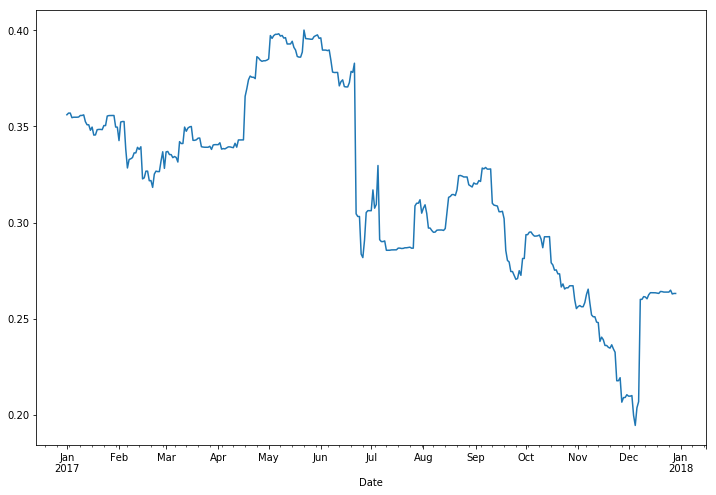

In [5]:
df_filled = df.asfreq('D', method='ffill')
daily_changes= df_filled.pct_change()
abn_returns = daily_changes['EURONEXT/ABN - Last']
santa_returns = daily_changes['EURONEXT/SANTA - Last']
window = int(len(df_filled.index)/2)
df_corrs = abn_returns\
    .rolling(window=window, min_periods=window)\
    .corr(other=santa_returns)\
    .dropna()
df_corrs.plot(figsize=(12, 8));

## Simple moving averages


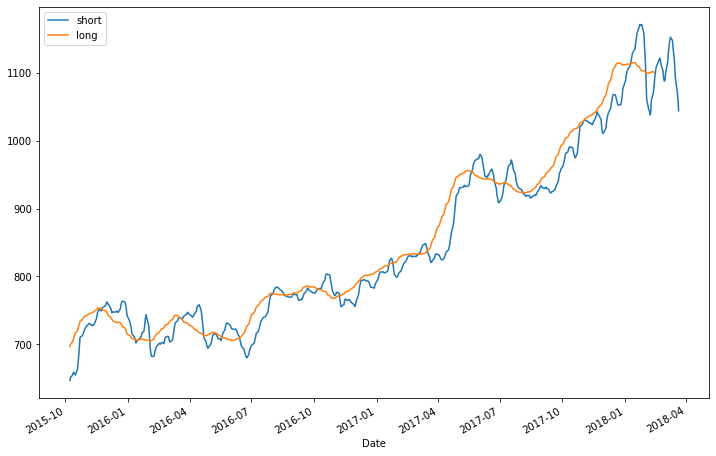

In [64]:
my_df['GOOG']
series_short = my_df['GOOG'].rolling(window=5, min_periods=5).mean()
series_long = my_df['GOOG'].rolling(window=30, min_periods=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));

## Exponential Moving Average


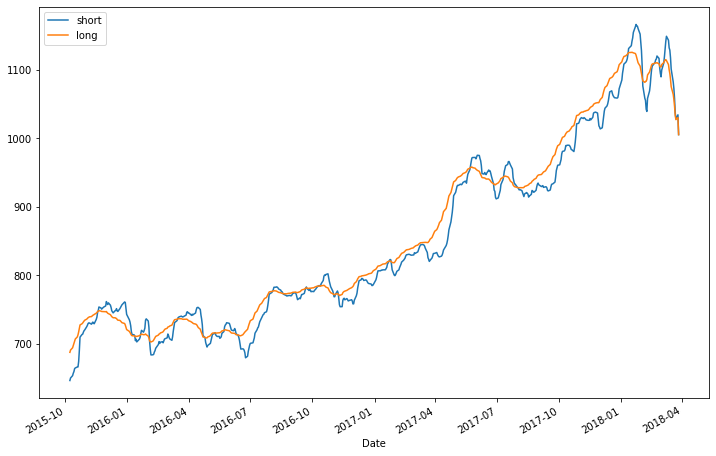

In [65]:
import pandas as pd

series_short = my_df['GOOG'].ewm(span=5).mean()
series_long = my_df['GOOG'].ewm(span=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));